# Условия
Вариант 15



In [71]:
import numpy as np
from numpy import sin, log, sqrt
from numpy.linalg import solve
import matplotlib.pyplot as plt

In [72]:
def p_i(x):
    return 2 * sqrt(x + 1)


def q_i(x):
    return -1 / sqrt(x + 1)


def f(x):
    return -log(x + 1) / sqrt(x + 1) + 2

In [73]:
def r_i(x, h):
    p = p_i(x)


    return p / 2 * h



def a_i(x, h):
    p = p_i(x)
    r = r_i(p, h)


    return (1 + r * sin(r) - r) / h**2


def b_i(x, h):
    return q_i(x) - a_i(x, h) - c_i(x, h)



def c_i(x, h):
    p = p_i(x)
    r = r_i(p, h)


    return (1 + r * sin(r) + r) / h**2

In [74]:
def prec(x):
    return sqrt(x + 1) * log(x + 1)

In [75]:
alpha_0 = 1
beta_0 = 0
gamma_0 = 0
alpha_1 = 1
beta_1 = 0
gamma_1 = 0.98025

# Решение

In [76]:
N = 100
h = 1 / N

X = np.linspace(0, 1, N + 1)
A = np.zeros((N + 1, N + 1))
b = np.zeros(N + 1)

In [77]:
for i in range(1, N):
    x = X[i]
    A[i][i - 1] = a_i(x, h)
    A[i][i] = b_i(x, h)
    A[i][i + 1] = c_i(x, h)
    
    b[i] = f(x)

In [ ]:
A[0][0] = alpha_0
A[0][1] = 0
A[0][2] = 0

A[N][N] = alpha_1
A[N][N - 1] = 0
A[N][N - 2] = 0

b[0] = gamma_0

b[N] = gamma_1

In [79]:
Y = solve(A, b)

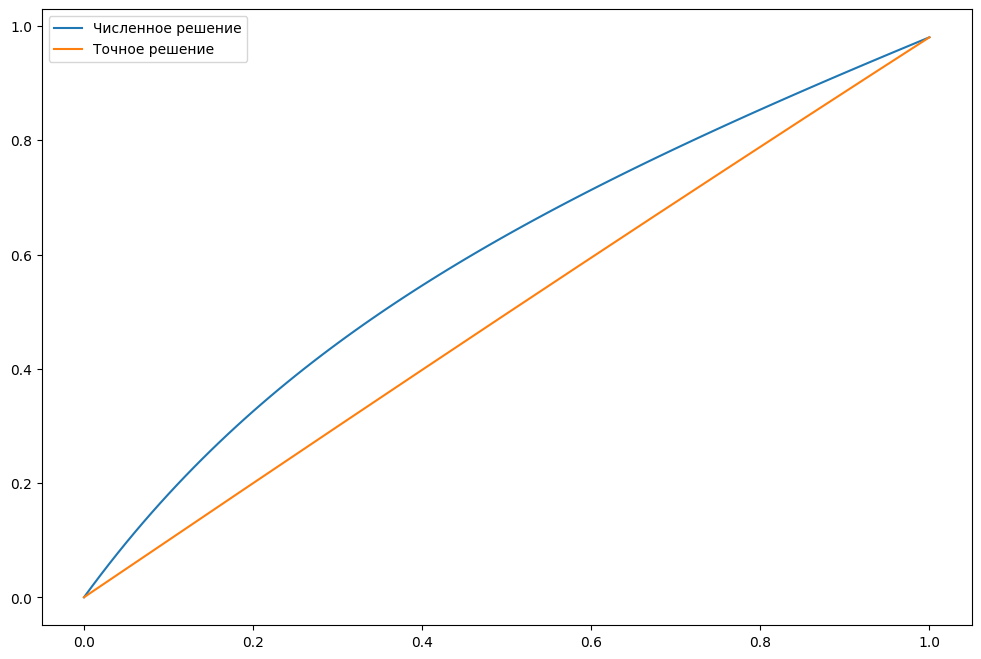

In [80]:
plt.figure(figsize=(12, 8))

plt.plot(X, Y, label='Численное решение')

tmp = np.linspace(0, 1, 1000)
plt.plot(tmp, prec(tmp), label='Точное решение')

plt.legend()

plt.show()